In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 1. Generate or load data (for example: sine wave)
time_steps = 500
t = np.arange(time_steps)
data = np.sin(0.02 * t) + 0.5 * np.random.normal(size=time_steps) # noisy sine wave

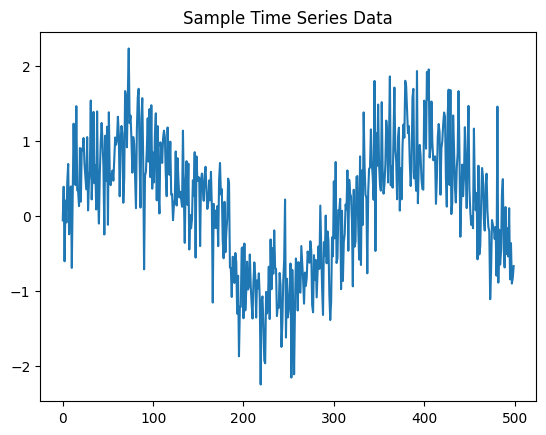

In [ ]:
# Plot the data
plt.plot(t, data)
plt.title("Sample Time Series Data")
plt.show()

In [ ]:
# 2. Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data = data.reshape(-1, 1)
data_scaled = scaler.fit_transform(data)

In [ ]:
# 3. Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Example usage
SEQ_LENGTH = 30
X, y = create_sequences(data_scaled, SEQ_LENGTH)


In [ ]:
# 4. Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# 5. Build LSTM model
model = Sequential([
LSTM(50, activation='tanh', input_shape=(SEQ_LENGTH, 1)),
Dense(1)
])

model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 6. Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16,
validation_split=0.1)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2147 - val_loss: 0.0160
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0183 - val_loss: 0.0203
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0184 - val_loss: 0.0225
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0139 - val_loss: 0.0170
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0148 - val_loss: 0.0168
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - val_loss: 0.0181
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0126 - val_loss: 0.0169
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - val_loss: 0.0245
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0147 - val_loss: 0.0167
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - val_loss: 0.0166
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0123 - val_loss: 0.0168
Epoch 12/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0

In [ ]:
# 7. Predict on test data
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


In [ ]:
# 8. Inverse transform to original scale
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

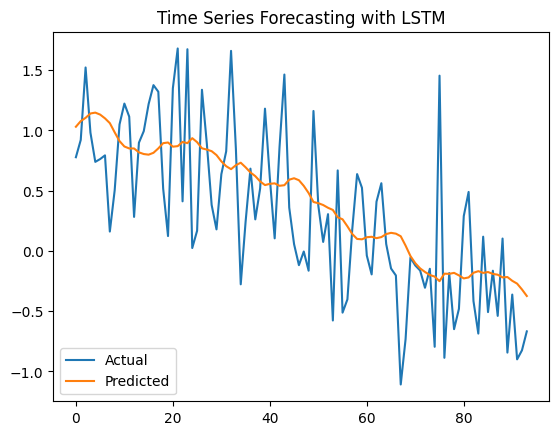

In [ ]:
# 9. Plot predictions vs actual
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("Time Series Forecasting with LSTM")
plt.legend()
plt.show()